## Data Scientist - Capstone - Stock Analysis

### Installed libraries required

pandas, numpy, matplotlib, seaborn, datetime, pandas_datareader,
tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
from IPython.display import display
from multi_plot import multi_plot
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)


# nasdaq listed companies
# resource https://datahub.io/core/nasdaq-listings#resource-nasdaq-listings_zip


In [4]:
## pip install for pandas-datareader
### pip install git+https://github.com/pydata/pandas-datareader.git
# For reading stock data from yahoo
from pandas_datareader.data import DataReader

In [5]:
# read and zip Ticker Symbol and company name into a dictionay
# And add in select company from NYSE
short_list=['AAPL','GOOG', 'T', 'VZ', 'F', 'GM']
# Read in Nasdaq companies
df=pd.read_csv('data/nasdaq-listed_csv.csv',usecols=['Symbol','Company Name'])
# No ready database from NYSE to added "manually"
nyse_df=pd.DataFrame({'Symbol':['T','VZ','F','GM'],
                                'Company Name':['AT&T Inc.',
                                                'Verizon Communications Inc.',
                                                'Ford Motor Company',
                                                'General Motors Company']})
df=pd.concat([df[df['Symbol'].isin(short_list)],nyse_df])
#create dictionary of company name and symbol
tck_dict=dict(zip(df['Symbol'],df['Company Name']))


In [6]:
#put limits limits on stocks and date
#lets look at the selected companies
# I chose two company from 3 different sectors
print('List of stocks under review')
display(df)
print()
# Use todays date as end and today's date - Year for start
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

List of stocks under review


,Symbol,Company Name
5,AAPL,Apple Inc.
1181,GOOG,Google Inc.
0,T,AT&T Inc.
1,VZ,Verizon Communications Inc.
2,F,Ford Motor Company
3,GM,General Motors Company


In [7]:
def multi_plot(df,ylabel,xlabel,hspace,wspace):
    '''
    purpose: will takin pandas dataframe and plot the columns using the index as the x axis
             and the column values as the y axis
    input:   - a data frame with numeric values in columns
             - cmap: dictionary used for small number of graphs
    output:  a dictionary of the containing the column name and a tuple of graph position
                 in a graph matrix (e.g. (0,0) or (1,3))
    '''
    import pandas as pd
    #%matplotlib inline
    import matplotlib.pylab as plt
    from IPython.display import display
    import matplotlib.dates as mdates
################################################################################    
    def map_it(col_list,nrows,ncols):
        '''
        purpose: This function will accept a list of column names and calculate the positioning
                 of each graph in a 2 wide or 3 wide (predetermined) layout
        input:   - a list of column names
                 - cmap: dictionary used for small number of graphs
        output:  a dictionary of the containing the column name and a tuple of graph position
                     in a graph matrix (e.g. (0,0) or (1,3))
        ''' 
        graph_loc={}
        row=0; col=0
        ncols=ncols-1;nrows=nrows-1
        for name in col_list:
            graph_loc[name]=(row,col)
            if col <= ncols-1:
                col=col+1
            else:
                if row < nrows:
                    row=row+1
                    col=0
        return graph_loc 
  ########################################################################  
    def nrow_ncols(col_list, small = {1:[1,1],2:[1,2],3:[2,2],4:[2,2]}):
        '''
        purpose: This function will accept a list of column names and calculate the number
                 of rows and columns needed for a graph matrix. Below 4 graphs it will use a
                 mix of 3 and 4 graphs wide. Over four columns it will us 3 graphs wide.
        input:   - col_list: list of columns to be graphed
                 - cmap: dictionary used for small number of graphs             - 
        output:  the number of rows and the number of columns needed for graphing. 
        call:    nrows,ncols=nrow_ncols(col_list)
        ''' 
        import math   
        len_cols=len(col_list)

        if len_cols in small.keys():
            ncols=small[len_cols][0]
            nrows=small[len_cols][1]
        else:
            nrows=math.ceil(len_cols/3)
            ncols=3
        return(nrows,ncols)
    ############################################################################
    ################ main plot routine #########################################
    
    col_list=list(df.columns)
    nrows,ncols=nrow_ncols(col_list)
    graph_loc=map_it(col_list,nrows,ncols)

    height=nrows*3.5
    fig,axes = plt.subplots(nrows=nrows, ncols=ncols, figsize= (15,height))
    fig.subplots_adjust(hspace=hspace)
    fig.subplots_adjust(wspace=wspace)

    for col in col_list:
        # The single row has to handled separately. Matplotlib does not care for [0,n]
        # arrays. it throws an error unless handled as a [n] array
        if nrows==1:
            df[col].plot(ax=axes[graph_loc[col][1]]);
            axes[graph_loc[col][1]].grid()
            axes[graph_loc[col][1]].set_title(col,fontsize=15);
            axes[graph_loc[col][1]].set_xlabel(xlabel,fontsize=20, color='b')
            axes[graph_loc[col][1]].set_ylabel(ylabel,fontsize=20)
            axes[graph_loc[col][1]].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
        else:
            df[col].plot(ax=axes[graph_loc[col][0],graph_loc[col][1]]);
            axes[graph_loc[col][0],graph_loc[col][1]].grid()
            axes[graph_loc[col][0],graph_loc[col][1]].set_title(col,fontsize=15);
            axes[graph_loc[col][0],graph_loc[col][1]].set_xlabel(xlabel,fontsize=20, color='r');
            for tick in axes[graph_loc[col][0],graph_loc[col][1]].get_xticklabels():
                tick.set_rotation(45)
                
            axes[graph_loc[col][0],graph_loc[col][1]].set_ylabel(ylabel,fontsize=20);
            axes[graph_loc[col][0],graph_loc[col][1]].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
            
    plt.show()
    return

In [8]:
#Read selected stock into dataframe
for indx,stock in enumerate(short_list):
    if indx==0:
        try:
            df=DataReader(stock, 'yahoo', start, end)
            df['tckr']=stock
        except KeyError:
            pass
    else:
        try:
            tmp_df=DataReader(stock, 'yahoo', start, end)
        except KeyError:
            pass
        tmp_df['tckr']=stock
        df=pd.concat([df,tmp_df],axis=0)
       

In [9]:
#explore dataset

df = df.dropna(subset=['tckr'])
print ('Shape of DataFrame:')
print (df.shape)
print()

# show tckrs and companies
df['company']=df['tckr'].map(tck_dict)
print('Companies under Review')
tmp_df=df.groupby(['tckr','company']).count()  
display(tmp_df[tmp_df.columns[:-6]])
df=df.drop(columns='company')

#Number of Nans
print()
print ("display number of NaN in columns")
display(df.isnull().sum(axis = 0))
print()

#Head and Tail of Database
print('Head and Tail of Database')
display(pd.concat([df.head(),df.tail()]))

Shape of DataFrame:
(1518, 7)

Companies under Review


,
tckr,company
AAPL,Apple Inc.
F,Ford Motor Company
GM,General Motors Company
GOOG,Google Inc.
T,AT&T Inc.
VZ,Verizon Communications Inc.



display number of NaN in columns


High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
tckr         0
dtype: int64


Head and Tail of Database


,High,Low,Open,Close,Volume,Adj Close,tckr
Date,,,,,,,
2019-11-14,66.220001,65.525002,65.937500,65.660004,89182800.0,64.569160,AAPL
2019-11-15,66.445000,65.752502,65.919998,66.440002,100206400.0,65.336212,AAPL
2019-11-18,66.857498,66.057503,66.449997,66.775002,86703200.0,65.665634,AAPL
2019-11-19,67.000000,66.347504,66.974998,66.572502,76167200.0,65.466507,AAPL
2019-11-20,66.519997,65.099998,66.385002,65.797501,106234400.0,64.704376,AAPL
2020-11-09,39.720001,38.630001,38.720001,38.959999,22100800.0,38.959999,GM
2020-11-10,41.590000,39.560001,39.750000,41.080002,26746900.0,41.080002,GM
2020-11-11,41.770000,40.110001,41.290001,40.560001,19841100.0,40.560001,GM
2020-11-12,40.240002,38.810001,40.110001,39.320000,20239900.0,39.320000,GM


In [10]:
#summary Stats for one company
print("stats for ",short_list[1])
df[df['tckr']==short_list[1]].describe()


stats for  GOOG


,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,1442.568092,1407.675448,1424.158956,1425.889977,1.869613e+06,1425.889977
std,142.050204,143.781128,142.572186,142.008603,7.738923e+05,142.008603
min,1071.319946,1013.536011,1056.510010,1056.619995,3.475000e+05,1056.619995
25%,1355.775024,1332.000000,1341.550049,1343.560059,1.385700e+06,1343.560059
50%,1448.359985,1423.209961,1439.010010,1438.390015,1.652300e+06,1438.390015
75%,1525.609985,1498.000000,1511.810059,1515.550049,2.072500e+06,1515.550049
max,1818.060059,1760.020020,1790.900024,1777.020020,4.329100e+06,1777.020020


## Stock Analysis at First Glance

### What are the Stock Trends

##### Daily Close Data 


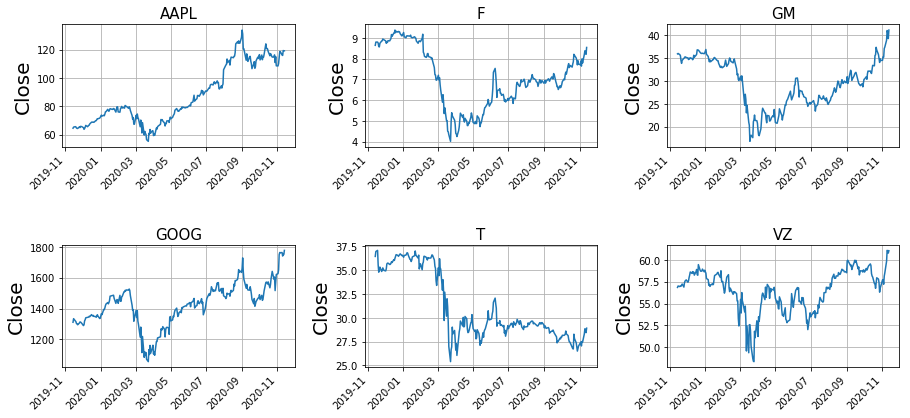

In [11]:
#multi-plot view of close data
#from multi_plot import multi_plot
tmp_df=df[['tckr','Adj Close']].reset_index().pivot(index='Date',columns='tckr',
                                                values='Adj Close').reset_index().set_index('Date')
multi_plot(tmp_df,"Close","", .8,.3)

##### Daily Volumes

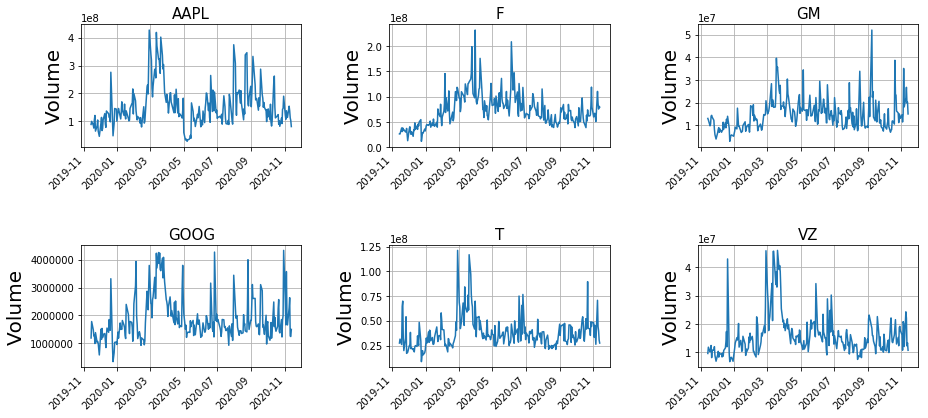

In [12]:
#multi-plot view of Volume data
tmp_df=df[['tckr','Volume']].reset_index().pivot(index='Date',columns='tckr',
                                                    values='Volume').reset_index().set_index('Date')
multi_plot(tmp_df,"Volume","", .8,.4)


#### Moving Average for Trend Analysis

A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the “noise” from random short-term price fluctuations. ... The most common applications of moving averages are to identify trend direction and to determine support and resistance levels. 

Ref#1 How to Use a Moving Average to Buy Stocks by Cory Mitchell
(https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp)

Ref#2 Python Pandas || Moving Averages and Rolling Window Statistics for Stock Prices
Mat McCarty (https://www.youtube.com/watch?v=T2mQiesnx8s)

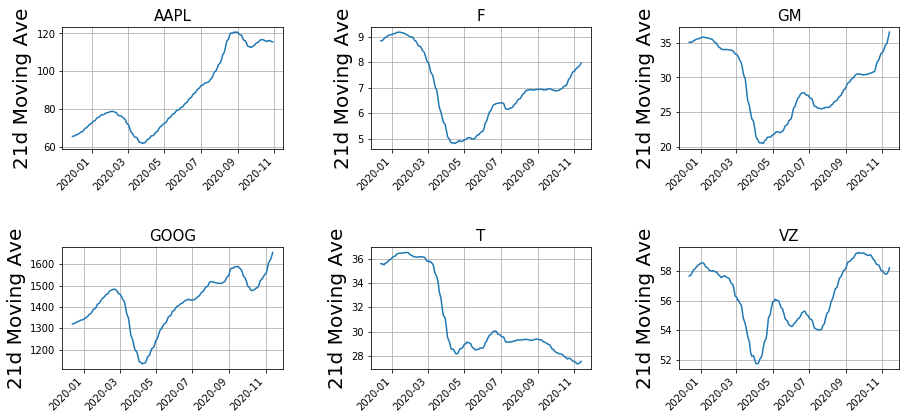

In [13]:
tmp_df=df[['tckr','Adj Close']].reset_index().pivot(index='Date',columns='tckr',
                                               values='Adj Close').reset_index().set_index('Date')
for indx,company in enumerate(tmp_df.columns):
    if indx==0:
        tmp_df2=tmp_df.iloc[:,indx].reset_index().set_index('Date').rolling(21,center=True).mean()
    else:
        tmp_df2=tmp_df2.merge(tmp_df.iloc[:,indx].reset_index().set_index('Date').rolling(21).mean(),on='Date')
multi_plot(tmp_df2,"21d Moving Ave","",.8,.4)  

### How Volatile is the Stock?
#### Measure Daily returns as a percentage

The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which create larger swings in value. 
ref: https://pocketsense.com/calculate-daily-stock-return-5138.html

#### Daily Percent Change shown as histograms
ref: Calculating Simple Statistics with Python and Pandas: Stock Market Data
 by Kevin Mooney (https://www.youtube.com/watch?v=oWQfgFZ1oHw)

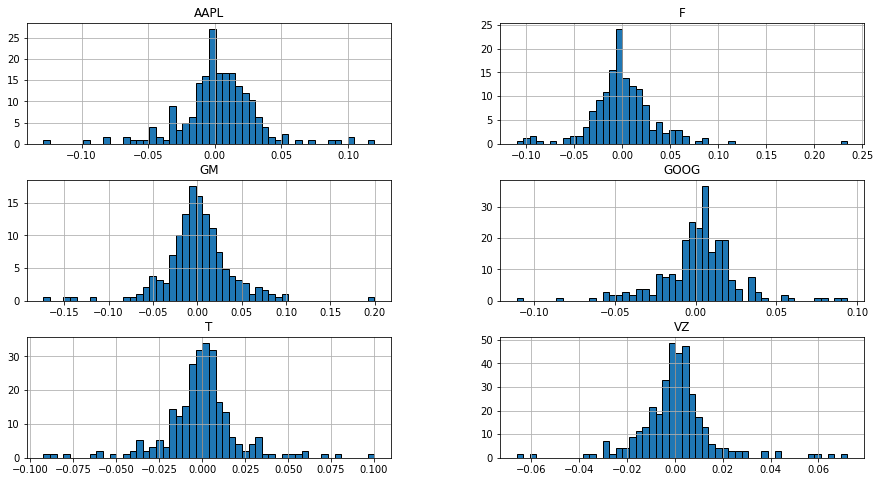

In [14]:

df['pct']=df.groupby('tckr')['Adj Close'].pct_change()
tmp_df=df[['tckr','pct']].reset_index().pivot(index='Date',columns='tckr',
                                                    values='pct').reset_index().set_index('Date')
tmp_df.hist(figsize=(15,8),bins=50, edgecolor='black',
           density=True);

#### Kurtosis
kurtosis is a measure that describes the shape of a distribution's tails in relation to its overall shape. A distribution can be infinitely peaked with low kurtosis, and a distribution can be perfectly flat-topped with infinite kurtosis. Thus, kurtosis measures "tailedness," not "peakedness." This means for our stock analysis that the higher the  number the more likely there will be outliers (volitility in the stock).

In [15]:
#kerosis numbers
kur_d={}
tmp2_df=tmp_df.unstack().reset_index().set_index('Date') \
            .rename(columns={0:'pct'})         
for company in short_list:
    kur_d[company]=tmp2_df[tmp2_df['tckr']==company]['pct'].kurtosis()

pd.DataFrame(kur_d,index=list(kur_d.keys())).reset_index().drop(columns='index').head(1)
    


,AAPL,GOOG,T,VZ,F,GM
0,3.996449,3.89897,4.762495,5.813261,8.509807,5.502305


### How Closely Corrolated are our plots?
#### Pairwise plots can show at a glance. When two stocks are closely corrolated we can see them group closer to the line.

Although all these stock show high correlation with one another (they are all tech stocks) we can see a higher correlation between Google and Facebook and a lower correlation between Apple and Tesla. 

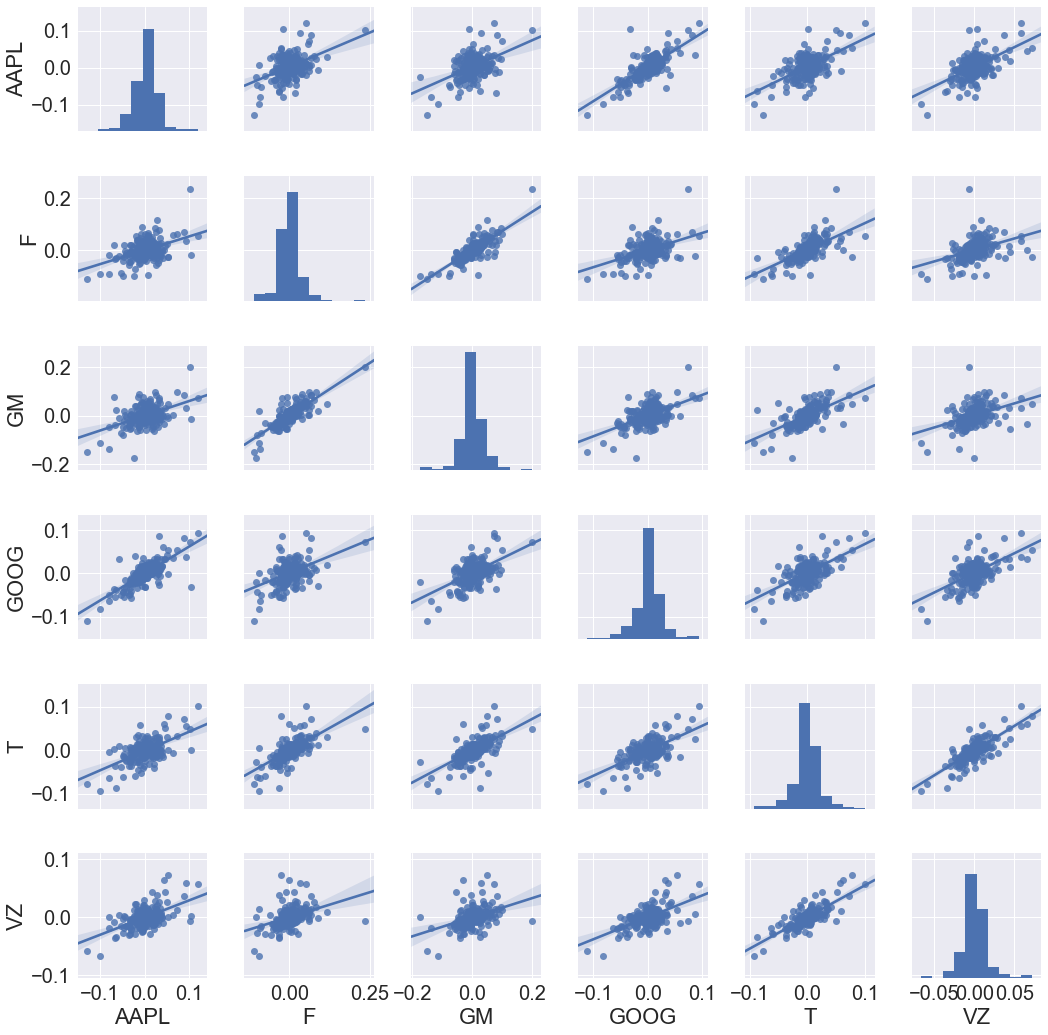

In [16]:
# Pairwise plots to visualize coorelations
cls_pct_change_df=df[['pct','tckr']].reset_index().dropna()
cls_pct_change_df=cls_pct_change_df.pivot_table(index='Date', columns='tckr', values='pct').dropna()
sns.set(font_scale=2)
sns.pairplot(cls_pct_change_df,kind='reg');

#### Heat maps are another Good Way to see Correlation
Here we see correlation values between each pair. We can see our earlier observations were borne out.  The correlation between Google and FaceBook is .81, while the correlation between Apple and Tesla is.5.

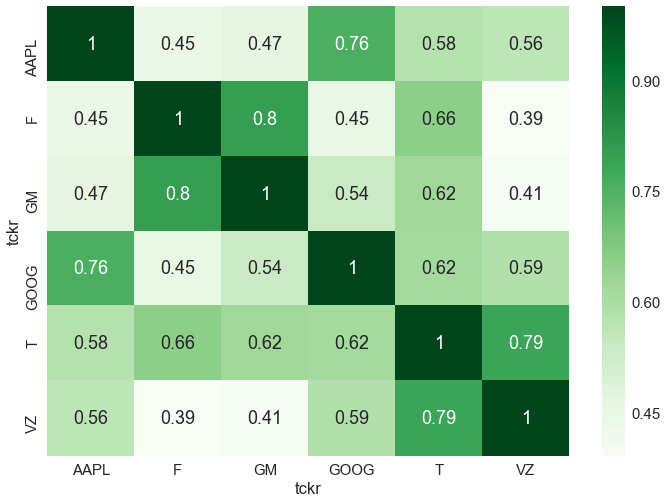

In [17]:
#closing percentage change as a heatmap
cls_pct_change_df
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
sns.heatmap(cls_pct_change_df.corr(), annot=True,cmap="Greens");

### Predicting the stock price with Stacked LSTM

In [18]:
# 1. Get a stock Quote
pred_stock_df=DataReader(short_list[0], data_source='yahoo')
print(short_list[0])
display(pd.concat([pred_stock_df.head(3),pred_stock_df.tail(2)]))


AAPL


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-16,28.559999,27.750000,27.844999,28.545000,152426800.0,26.231359
2015-11-17,28.762501,28.330000,28.730000,28.422501,110467600.0,26.118788
2015-11-18,29.372499,28.875000,28.940001,29.322500,186698800.0,26.945841
2020-11-12,120.529999,118.570000,119.620003,119.209999,103162300.0,119.209999
2020-11-13,119.669998,117.870003,119.440002,119.260002,81581900.0,119.260002


**Don't you wish you bought some Apple stock in 2015?**

Let's take a look at its performance on a graph

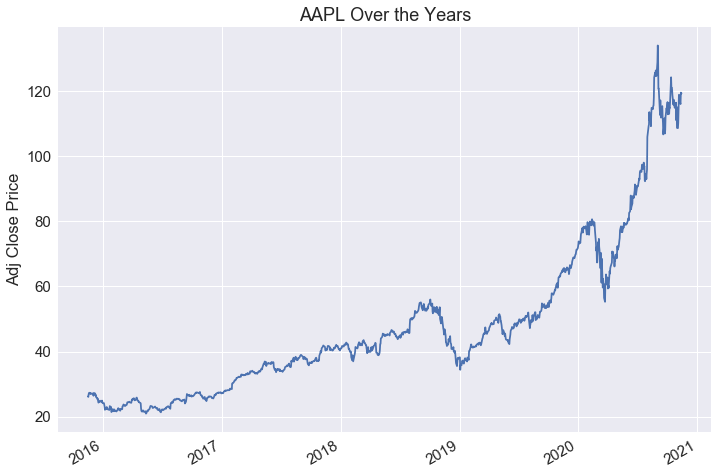

In [19]:
pred_stock_df['Adj Close'].plot(grid=True,title=short_list[0] +' Over the Years');
plt.xlabel('')
plt.ylabel('Adj Close Price')
plt.show();

**See you really wanted to buy in early 2019**

### Stock Prediction Program

In [20]:
def get_stock_data_optional_split(start_date,end_date,tckr,
                                 train_pcnt, col,split_data ):
    '''
    purpose: This module will pull information on a give stock from yahoo finance and
             split the data into test and training sets
    input:   - start and end dates for stock, the stock symbol, the training percentage
               and the column to be used (e.g. open price, adj close price, etc)
    output:  two numpy arrays. First the training data, second the test data
    '''
     
    from pandas_datareader.data import DataReader
    from datetime import datetime
    #read in stock data
    start = datetime. strptime(start_date, '%d/%m/%y')
    end = datetime. strptime(end_date, '%d/%m/%y')
    df=DataReader(tckr, 'yahoo', start, end)
    df=df[[col]]                                         
    if split_data=="yes":
        #split the time series data (stock prices) into train and test
        training_size=int(len(df)*.70)
        test_size=len(df)-training_size
        train_data_df,test_data_df=df.iloc[:training_size],df.iloc[-test_size:]
    else:
        return(df,0)
    return(train_data_df,test_data_df)

Why Scale

"The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting."

ref:https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79


In [21]:
def scale_and_shape(training_np_array,look_back):
    '''
    purpose: This module prepare data for modeling by scaling ist and then creating
             feature and label lists. Finally if reshaped the feature data for use
             by Keras tensorflow library
    input:   - the training data from the stock prices as a numpy array and
             - the number of days we are going to use (look-back) to develop our 
               predictions
    output: - a reshaped list of scaled features
    '''
    #scale numbers
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range = (0, 1))
    training_scaled = scaler.fit_transform(training_np_array)
    data_len=training_scaled.shape[0]
    
    #convert to right shape
    features_set = []
    labels = []
    for i in range(look_back, data_len):
        features_set.append(training_scaled[i-look_back:i, 0])
        labels.append(training_scaled[i, 0])
    features_set, labels = np.array(features_set), np.array(labels)
    features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
    return(features_set,labels,scaler)

#### Create the LSTM model
References
- 1. "Using a Keras Long Short-Term Memory (LSTM) Model to Predict Stock Prices" by Derrick Mwiti
https://heartbeat.fritz.ai/using-a-keras-long-shortterm-memory-lstm-model-to-predict-stock-prices-a08c9f69aa74
- 2. Time Series Analysis with LSTM using Python's Keras Library" by Usman Malik 
https://stackabuse.com/time-series-analysis-with-lstm-using-pythons-keras-library/


- **Sequential** for initializing the neural network
- **Dense**      for adding a densely connected neural network layer
- **LSTM**       for adding the Long Short-Term Memory layer
- **Dropout**    for adding dropout layers that prevent overfitting
    - When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped.



In [22]:
def create_tensor_flow_model(features):
    '''
    purpose: This module is to create the LSTM layered model used for the deep learning
             prediction.
    input:   - the scaled stock prices to be used for the prediction.
    output: - the LSTM model object
    '''   
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.layers import LSTM
    from tensorflow.keras.layers import Dropout
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(features.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    display(model.summary())
    return(model)

In [23]:
def compare_act_to_predict_and_plot(training_df,testing_df,start_date,end_date,tckr,
                                    look_back,scaler):
    '''
    purpose: This module is to use the fitted model to create stock prediction data over
             an historical period of time and display the result on the same plot
             as the actual stock prices for that period.
    input:   - the test and training dataframes, the 
    output: - the LSTM model object
    '''  
    # grab the price column we are working with
    col=training_df.columns.to_list()
    print("col",col)
    #display(df)
    col=col[0]
    split_data='no'
    train_pcnt=.70
    # get actual stock prices for prediction period
    stock_price, na=get_stock_data_optional_split(start_date,end_date,tckr,train_pcnt, col,split_data)
    days_in_prediction=len(stock_price)
    #### create prediction data
    # pull together the training and testing date
    t_and_t_df=pd.concat([training_df,testing_df],axis=0)

    #for the test inputs we need the number of predictions plus the lookback period
    test_inputs=t_and_t_df.tail(look_back+days_in_prediction).values
    
    #reshape and scale the data
    test_inputs = test_inputs.reshape(-1,1)
    test_inputs = scaler.transform(test_inputs)
    
    # create prediction list
    test_features = []
    for i in range(look_back, look_back+days_in_prediction):
        test_features.append(test_inputs[i-look_back:i, 0])
    test_features=test_features[0:len(stock_price)]

    # convert to numpy and reshape for model
    test_features = np.array(test_features)
    test_features = np.reshape(test_features, (test_features.shape[0], 
                                               test_features.shape[1], 1))
    #use model to predict new values
    predictions = model.predict(test_features)
    
    #reverse scaling for plot
    predictions = scaler.inverse_transform(predictions)
   
    #plot results
    plot_df=stock_price
    stock_price['prediction']=predictions
    stock_price.columns = ['Actual', 'Predicted']
    colors = ['black', 'red']
    ax=stock_price.plot(figsize=(15,8),grid=True,title=tckr+': Compare Actual to Predicted')
    [ax.lines[i].set_color(color) for i, color in enumerate(colors)]
    ax.set_xlabel("")
    ax.set_ylabel(col+": Price")
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('red')
    return

In [24]:
def plot_loss(history):
    '''
    purpose: This module will product a plot of the loss value from the model history
    input:   - the history object
    output: - a plot of the loss vs epoch
    '''  
    # ref: https://stackoverflow.com/questions/52614922/
    #how-to-plot-training-loss-and-accuracy-curves-for-a-mlp-model-in-keras
    loss_values = history.history['loss']
    epochs = range(1, len(loss_values)+1)

    plt.plot(epochs, loss_values, label='Training Loss', color="black")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000252A2D853C8>>

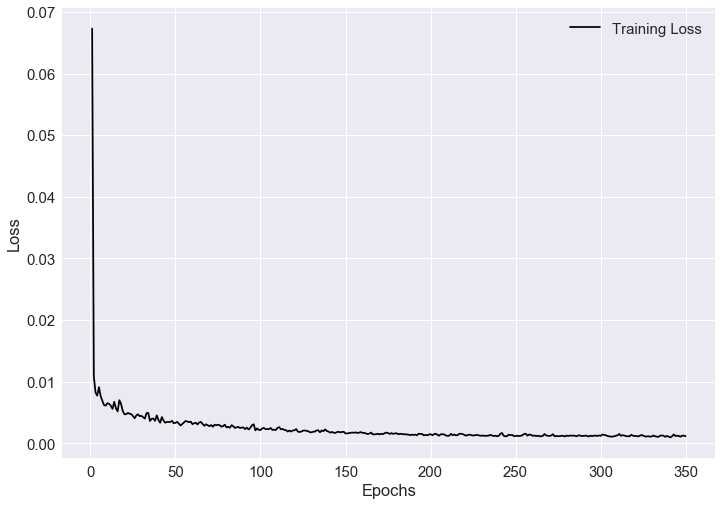

col ['Adj Close']


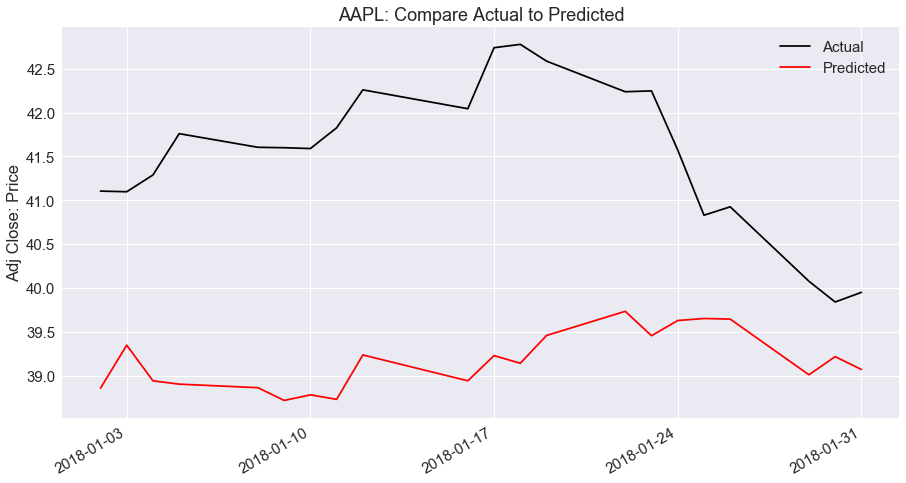

In [30]:
##### Stock Prediction ###########
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Variables
tckr='AAPL' # Stock symbol for analyis
col='Adj Close'
hist_data_start,hist_data_end='01/01/13', '31/12/17'
train_pcnt=.70
look_back=60
compare_start,compare_end='01/01/18', '31/01/18'
epochs=350; batch_size=32
#################
#pull the training and test data
start_date=hist_data_start
end_date=hist_data_end
split_data='yes'
training_df,testing_df=get_stock_data_optional_split(start_date,
                                    end_date,tckr,train_pcnt,
                                                     col,split_data)
training_array= training_df.values
testing_array = testing_df.values

# scale and shape data
features,labels,scaler=scale_and_shape(training_array,look_back=look_back)

# create model
model=create_tensor_flow_model(features)

# fit model
history=model.fit(features, labels, epochs = epochs, batch_size = batch_size,verbose=0)

# plot the loss vs epoch
plot_loss(history)

#Generate predictions and plot comparison to actuals
start_date=compare_start
end_date=compare_end
compare_act_to_predict_and_plot(training_df,testing_df,
                                start_date,end_date,
                                tckr,look_back,scaler)
